### Условие 1:
##### Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information
##### Постройте график. Назовите график
##### Сделайте именование оси x и оси y
##### Сделайте выводы
#### 1.2 Изучите стоимости недвижимости

Text(0, 0.5, 'Кол-во домов')

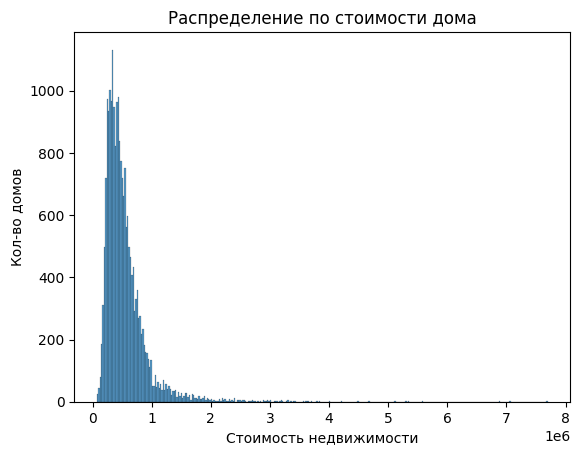

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./kc_house_data.csv',sep=',')
sns.histplot(x=df['price'])
plt.title('Распределение по стоимости дома')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Кол-во домов')



#### 1.3 Изучите распределение квадратуры жилой

Text(0, 0.5, 'Кол-во домов')

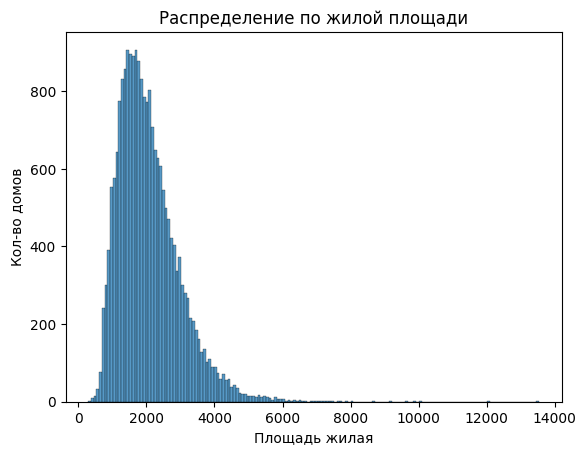

In [38]:
#
sns.histplot(x=df['sqft_living'])
plt.title('Распределение по жилой площади')
plt.xlabel('Площадь жилая')
plt.ylabel('Кол-во домов')

#### 1.4 Изучите распределение года постройки

Text(0, 0.5, 'Кол-во домов')

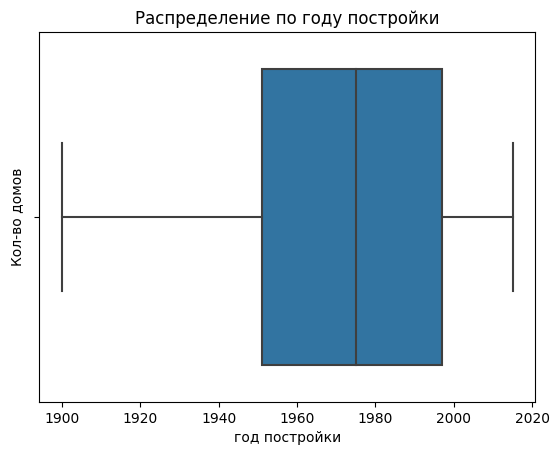

In [39]:
# изменение типа данных 
sns.boxplot(x=df['yr_built'])
plt.title('Распределение по году постройки')
plt.xlabel('год постройки')
plt.ylabel('Кол-во домов')

## Условие 2: 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную
#### Постройте график
#### Сделайте выводы

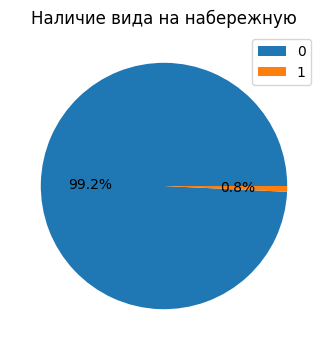

In [40]:
plt.figure(figsize=(6,4))
data = df['waterfront'].value_counts()
plt.pie(data, autopct='%1.1f%%')
plt.title('Наличие вида на набережную')
plt.legend(data.index)


#### 2.2 Изучите распределение этажей домов

Text(0, 0.5, 'Кол-во домов')

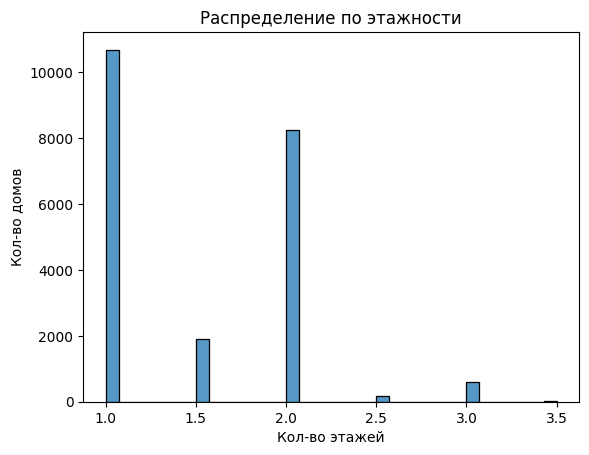

In [41]:
sns.histplot(x=df['floors'])
plt.title('Распределение по этажности')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов')

### 2.3 Изучите распределение состояния домов

Text(0, 0.5, 'Кол-во домов')

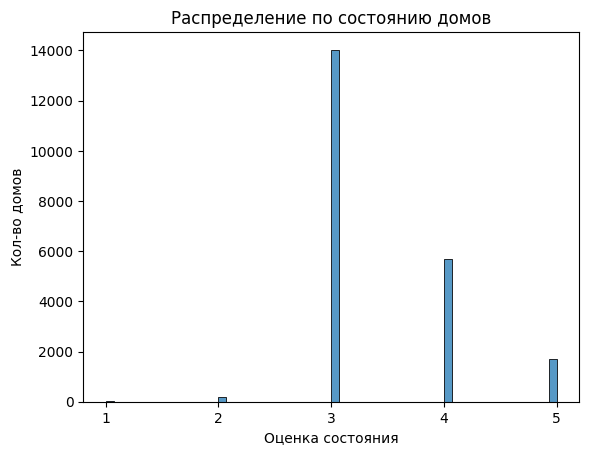

In [42]:
sns.histplot(x=df['condition'])
plt.title('Распределение по состоянию домов')
plt.xticks([1,2,3,4,5])
plt.xlabel('Оценка состояния')
plt.ylabel('Кол-во домов')


### Условие 3: 3 задача
#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
#### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Text(0.5, 0, 'Состояние дома')

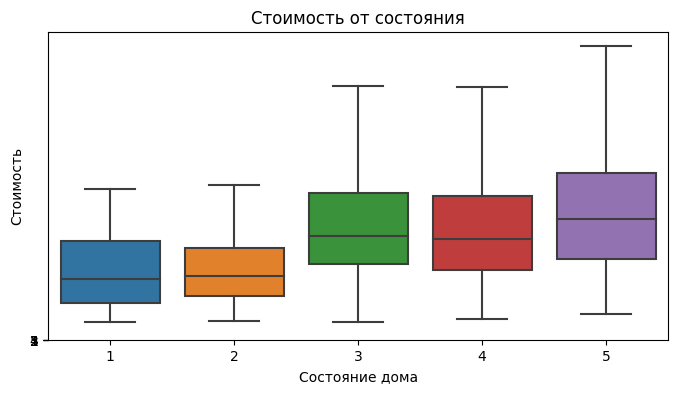

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['condition'], y=df['price'], showfliers=False)
plt.title('Стоимость от состояния')
plt.yticks([1,2,3,4,5])
plt.ylabel('Стоимость')
plt.xlabel('Состояние дома')
# по диаграмме видно, что дома в состоянии 1-2 заметно дешевле домов в состоянии 3-5, 
# причем цены на дома в удовлетворительном и хорошем состоянии примерно одинаковы, 
# дома же в отличном состоянии имеют самую высокую стоимость.

C:\Users\Админ\AppData\Local\Temp\ipykernel_10032\1607892899.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

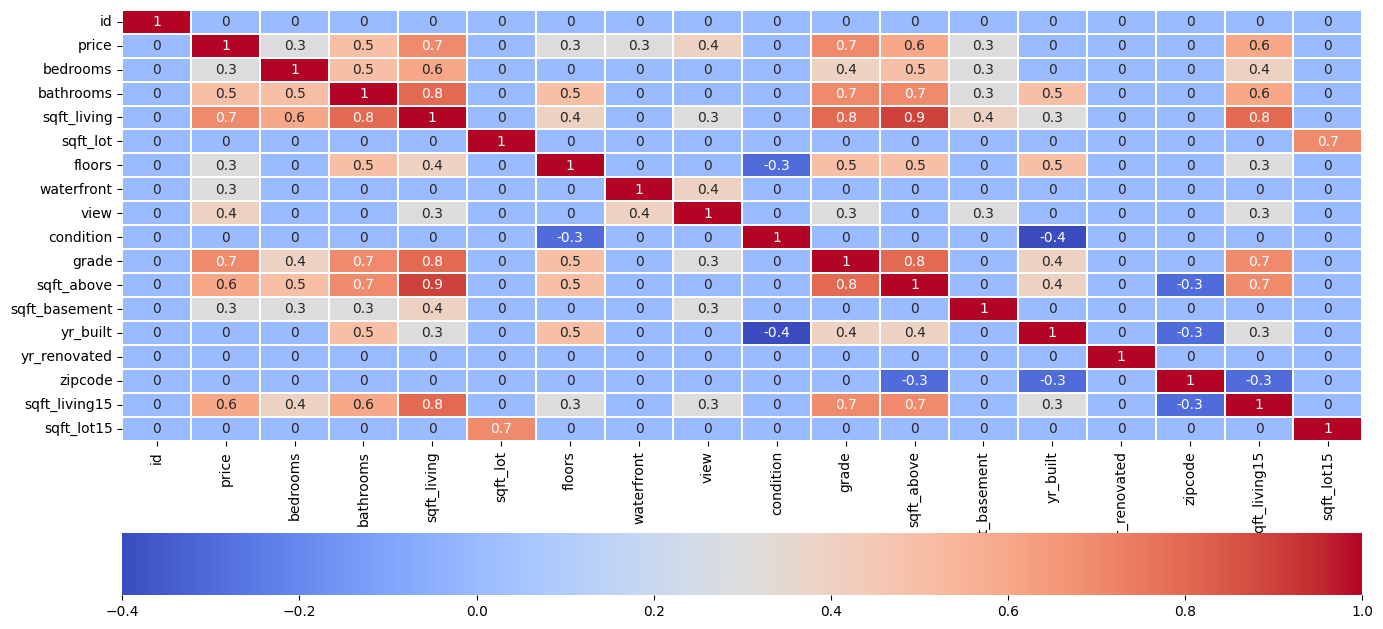

In [55]:
#
df.head()
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True,fmt='.1g', linewidths=.2, cmap='coolwarm', cbar_kws= {'orientation': 'horizontal'} )
# тепловая карта показывает нам что цена домов имеет достаточно сильную прямую линейную связь с жилой площадью и оценкой дома
# среднюю прямую взаимосвязь цена дома имеет с площадью чердака/мансарды и площадью живущих рядом 15 соседей, а так же количеством ванных комнат